In [18]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv("../../assets/datasets/mtcars.csv")

In [3]:
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [4]:
car = df['Car']

Create a column with numeric values for the cars

In [8]:
def car_to_numeric(x):
    if x == 'Mazda RX4':
        return 1
    if x == 'Mazda RX4 Wag':
        return 2
    if x == 'Datsun 710':
        return 3
    if x == 'Hornet 4 Drive':
        return 4
    if x == 'Hornet Sportabout':
        return 5
    if x == 'Valiant':
        return 6
    if x == 'Duster 360':
        return 7
    if x == 'Merc 240D':
        return 8
    if x == 'Merc 230':
        return 9
    if x == 'Merc 280':
        return 10
    if x == 'Merc 280C':
        return 11
    if x == 'Merc 450SE':
        return 12
    if x == 'Merc 450SL':
        return 13
    if x == 'Merc 450SLC':
        return 14
    if x == 'Cadillac Fleetwood':
        return 15
    if x == 'Lincoln Continental':
        return 16
    if x == 'Chrysler Imperial':
        return 17
    if x == 'Fiat 128':
        return 18
    if x == 'Honda Civic':
        return 19
    if x == 'Toyota Corolla':
        return 20
    if x == 'Toyota Corona':
        return 21
    if x == 'Dodge Challenger':
        return 22
    if x == 'AMC Javelin':
        return 23
    if x == 'Camaro Z28':
        return 24
    if x == 'Pontiac Firebird':
        return 25
    if x == 'Fiat X1-9':
        return 26
    if x == 'Porsche 914-2':
        return 27
    if x == 'Lotus Europa':
        return 28
    if x == 'Ford Pantera L':
        return 29
    if x == 'Ferrari Dino':
        return 30
    if x == 'Maserati Bora':
        return 31
    if x == 'Volvo 142E':
        return 32

In [11]:
df['car_numeric']= df['Car'].apply(car_to_numeric)

In [12]:
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4,2


Plot the Data (Can Plot for Various Combinations of Variables)

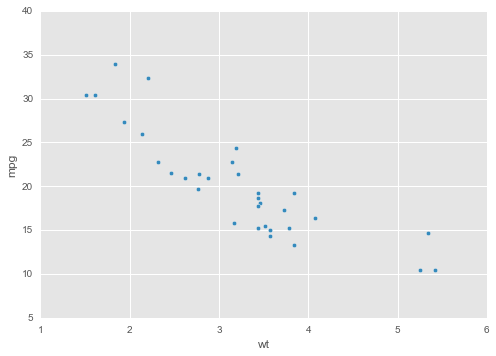

In [15]:
df.plot(kind='scatter',x='wt',y='mpg')
## Try this for multiple variable combinations

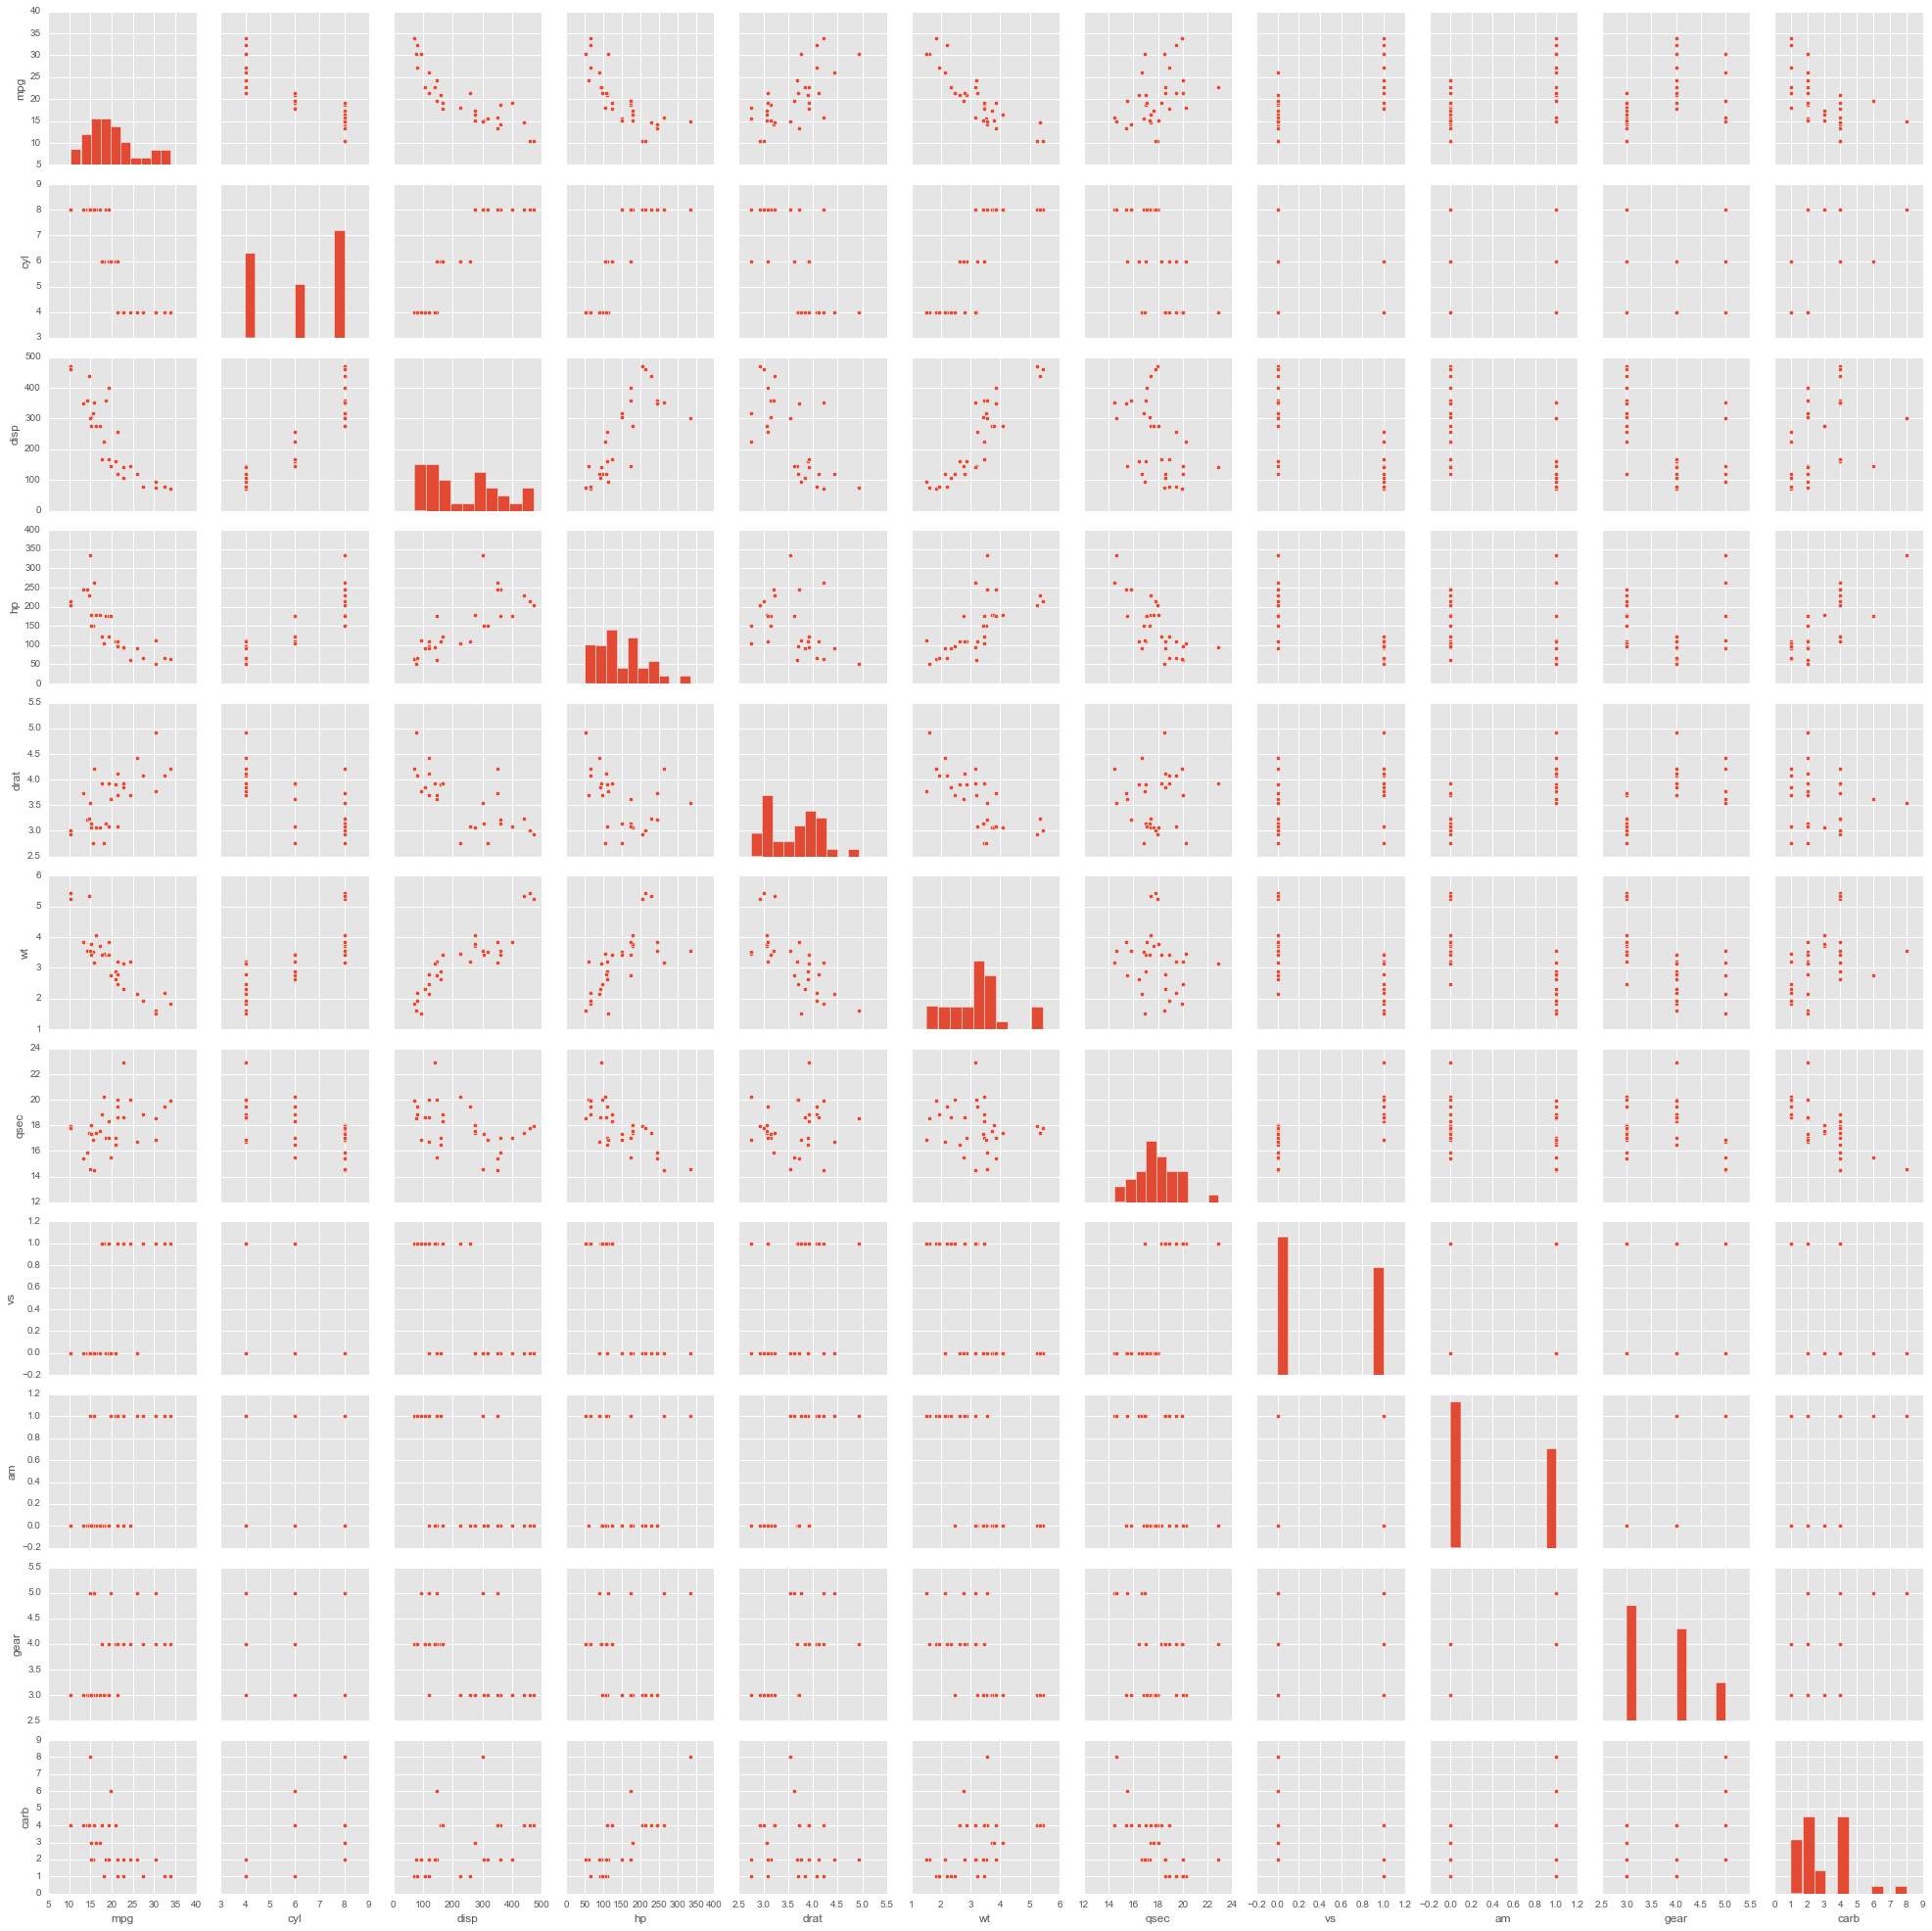

In [16]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Convert to Matrix and normalize your features

In [24]:
df.drop('Car',1, inplace=True)

ValueError: labels ['Car'] not contained in axis

In [25]:
X = preprocessing.MinMaxScaler().fit_transform(df)

In [27]:
pd.DataFrame(X, columns=df.columns).describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.412367,0.546875,0.398159,0.334585,0.385513,0.435758,0.398661,0.437500,0.406250,0.343750,0.258929,0.500000
std,0.256466,0.446480,0.309151,0.242272,0.246396,0.250181,0.212731,0.504016,0.498991,0.368902,0.230743,0.302607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213830,0.000000,0.124033,0.157244,0.147465,0.273140,0.284821,0.000000,0.000000,0.000000,0.142857,0.250000
50%,0.374468,0.500000,0.312297,0.250883,0.430876,0.463309,0.382143,0.000000,0.000000,0.500000,0.142857,0.500000
75%,0.527660,1.000000,0.635819,0.452297,0.534562,0.536180,0.523810,1.000000,1.000000,0.500000,0.428571,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Cluster - Choose K based on your plots and variables chosen

In [34]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [35]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

Find the Silhoutte Score and plot

In [36]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.45018258767850916

In [37]:
df['label'] = labels
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric,label
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,2
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2,2
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,4,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,5,0


Finally, reassign your labels to the dataframe, and plot variables against each other according to color. Try this in both seaborn and matplotlib. 

What do you notice about your clusters?

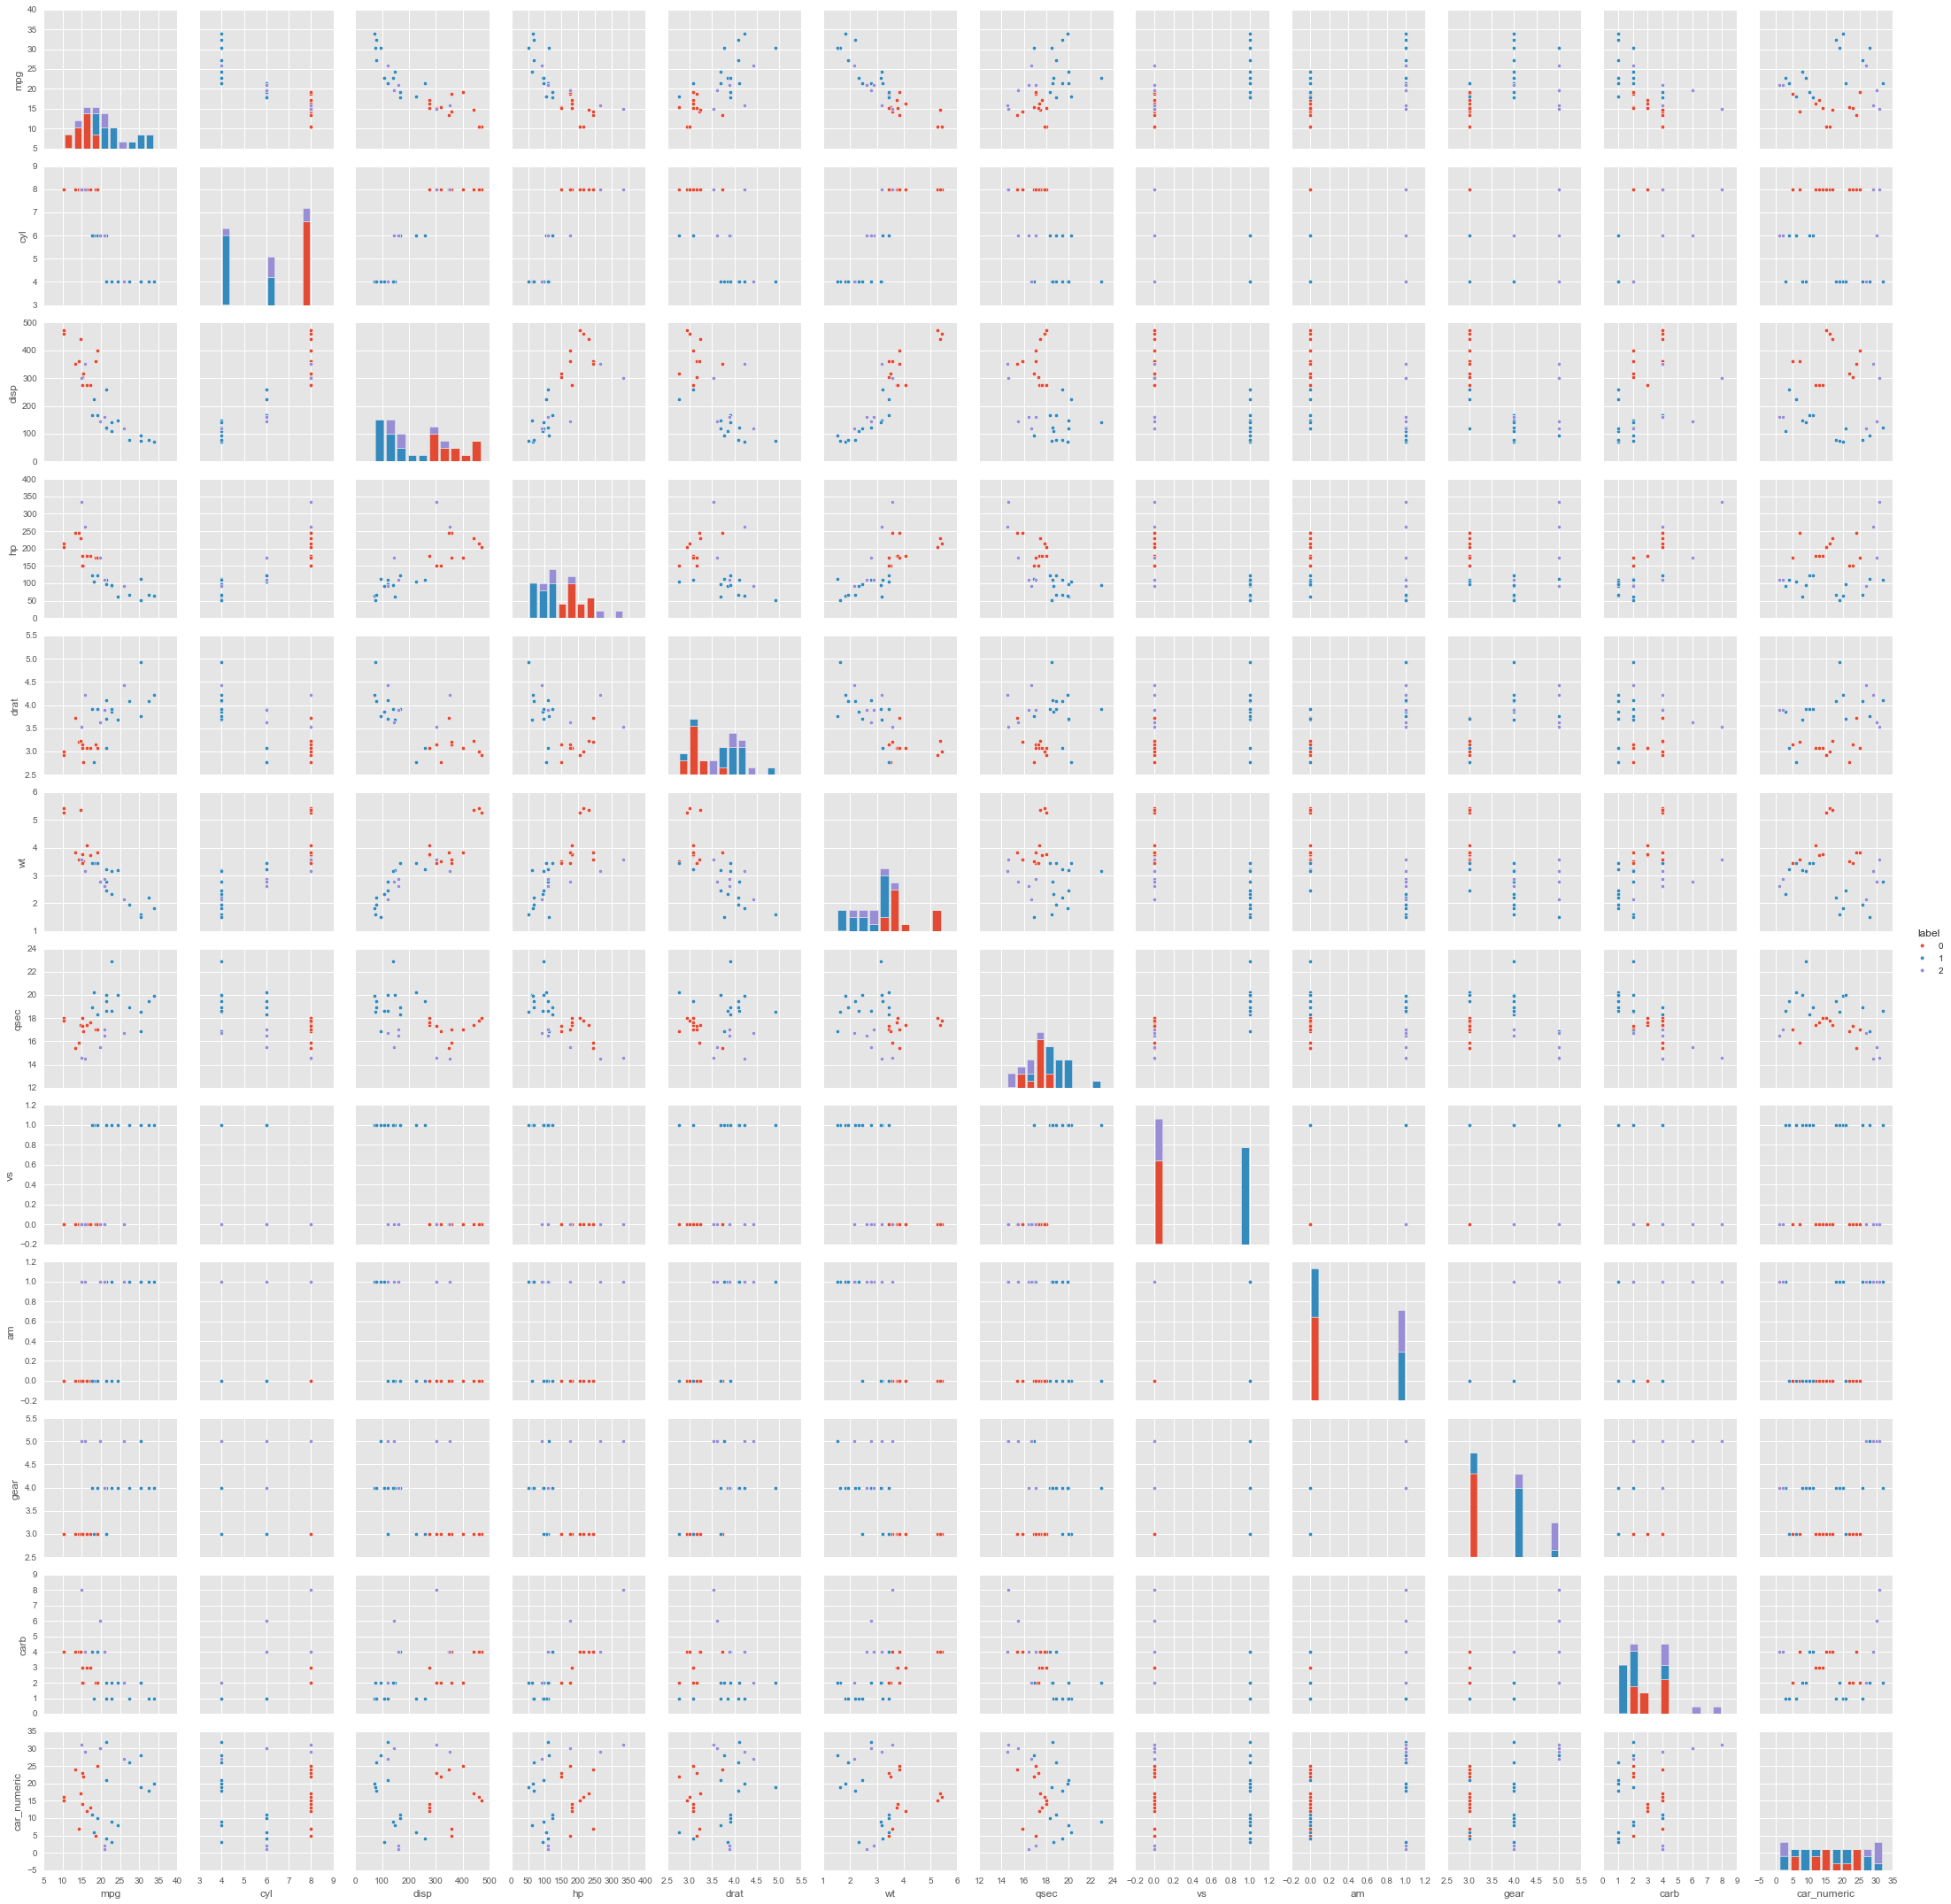

In [38]:
cols = df.columns[:-1]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')